In [490]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [491]:
demand=pd.read_csv('DemandHistory.csv')
inventory=pd.read_csv('Inventory.csv')
skumaster=pd.read_csv('SKUMaster.csv')

In [492]:
pd.set_option("display.max_rows", 1500)

In [493]:
inventory

,SKU,UOM,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053.0,Units,489.0,186.0,278.0,279.0,506.0,440.0,293.0,303.0,130.0,537.0,518.0,100.0
1,110054.0,Units,247.0,61.0,53.0,263.0,23.0,244.0,131.0,16.0,96.0,76.0,163.0,234.0
2,110056.0,Units,302.0,44.0,282.0,340.0,121.0,311.0,168.0,286.0,300.0,93.0,208.0,255.0
3,110124.0,Units,209.0,367.0,520.0,336.0,475.0,375.0,173.0,205.0,396.0,286.0,310.0,481.0
4,110125.0,Units,352.0,310.0,402.0,155.0,342.0,453.0,380.0,472.0,327.0,414.0,381.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
inventory.dropna(how="all",axis=0, inplace=True)
inventory

,SKU,UOM,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053.0,Units,489.0,186.0,278.0,279.0,506.0,440.0,293.0,303.0,130.0,537.0,518.0,100.0
1,110054.0,Units,247.0,61.0,53.0,263.0,23.0,244.0,131.0,16.0,96.0,76.0,163.0,234.0
2,110056.0,Units,302.0,44.0,282.0,340.0,121.0,311.0,168.0,286.0,300.0,93.0,208.0,255.0
3,110124.0,Units,209.0,367.0,520.0,336.0,475.0,375.0,173.0,205.0,396.0,286.0,310.0,481.0
4,110125.0,Units,352.0,310.0,402.0,155.0,342.0,453.0,380.0,472.0,327.0,414.0,381.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,8491839.0,Units,381.0,635.0,486.0,966.0,770.0,237.0,454.0,148.0,127.0,913.0,588.0,904.0
22919,8494759.0,Units,30.0,151.0,31.0,90.0,153.0,141.0,140.0,197.0,128.0,29.0,140.0,161.0
22920,8495038.0,Units,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22921,8495046.0,Units,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Q1)Normalize the inventory, and demand dataset

# Normalizing the demand set

In [495]:
demand

,SKU,Measure,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053,Retail,559,"1,738",755,769,519,919,519,709,779,589,519,699
1,110053,GM$,333,790,452,457,309,547,309,422,459,350,309,416
2,110053,Units,56,234,75,77,52,92,52,71,79,59,52,70
3,110053,Weight,15,61,20,20,14,24,14,18,21,15,14,18
4,110053,Cube,1,5,1,1,1,2,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114620,8495053,Units,0,0,1,0,0,0,0,0,0,0,0,0
114621,8495053,Retail,0,0,1,0,0,0,0,0,0,0,0,0
114622,8495053,GM$,0,0,1,0,0,0,0,0,0,0,0,0
114623,8495053,Weight,0,0,0,0,0,0,0,0,0,0,0,0


In [496]:
demand=demand.melt(id_vars=['SKU','Measure'],var_name='Month').sort_values(by=['SKU','Month']).reset_index(drop=True)

In [497]:
#demand.pivot(index=['SKU'])

In [498]:
demand=demand.pivot_table(columns='Measure',values='value',index=['SKU','Month'],aggfunc='first').reset_index()

In [499]:
demand['Cube']=demand['Cube'].str.replace(',', '').astype(float)
demand['GM$']=demand['GM$'].str.replace(',', '').astype(float)
demand['Retail']=demand['Retail'].str.replace(',', '').astype(float)
demand['Units']=demand['Units'].str.replace(',', '').astype(float)
demand['Weight']=demand['Weight'].str.replace(',', '').astype(float)

In [500]:
demand.dtypes

Measure
SKU         int64
Month      object
Cube      float64
GM$       float64
Retail    float64
Units     float64
Weight    float64
dtype: object

In [501]:
demand.head(1000)

Measure,SKU,Month,Cube,GM$,Retail,Units,Weight
0,110053,Apr,1.0,457.0,769.0,77.0,20.0
1,110053,Aug,1.0,422.0,709.0,71.0,18.0
2,110053,Dec,1.0,416.0,699.0,70.0,18.0
3,110053,Feb,5.0,790.0,1738.0,234.0,61.0
4,110053,Jan,1.0,333.0,559.0,56.0,15.0
5,110053,Jul,1.0,309.0,519.0,52.0,14.0
6,110053,Jun,2.0,547.0,919.0,92.0,24.0
7,110053,Mar,1.0,452.0,755.0,75.0,20.0
8,110053,May,1.0,309.0,519.0,52.0,14.0
9,110053,Nov,1.0,309.0,519.0,52.0,14.0


In [502]:
demand.columns.tolist()

['SKU', 'Month', 'Cube', 'GM$', 'Retail', 'Units', 'Weight']

# Normalizing the inventory set

In [503]:
inventory

,SKU,UOM,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,110053.0,Units,489.0,186.0,278.0,279.0,506.0,440.0,293.0,303.0,130.0,537.0,518.0,100.0
1,110054.0,Units,247.0,61.0,53.0,263.0,23.0,244.0,131.0,16.0,96.0,76.0,163.0,234.0
2,110056.0,Units,302.0,44.0,282.0,340.0,121.0,311.0,168.0,286.0,300.0,93.0,208.0,255.0
3,110124.0,Units,209.0,367.0,520.0,336.0,475.0,375.0,173.0,205.0,396.0,286.0,310.0,481.0
4,110125.0,Units,352.0,310.0,402.0,155.0,342.0,453.0,380.0,472.0,327.0,414.0,381.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22918,8491839.0,Units,381.0,635.0,486.0,966.0,770.0,237.0,454.0,148.0,127.0,913.0,588.0,904.0
22919,8494759.0,Units,30.0,151.0,31.0,90.0,153.0,141.0,140.0,197.0,128.0,29.0,140.0,161.0
22920,8495038.0,Units,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22921,8495046.0,Units,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [504]:
inventory.drop(columns='UOM',axis=1,inplace=True)

In [505]:
inventory=pd.melt(inventory, id_vars=['SKU'],var_name='Month',value_name='Units')
inventory['SKU'] = inventory['SKU'].astype(int)

In [506]:
inventory.dtypes

SKU        int32
Month     object
Units    float64
dtype: object

In [507]:
inventory.head(500)

,SKU,Month,Units
0,110053,Jan,489.0
1,110054,Jan,247.0
2,110056,Jan,302.0
3,110124,Jan,209.0
4,110125,Jan,352.0
5,110127,Jan,3.0
6,110132,Jan,11.0
7,110239,Jan,250.0
8,110742,Jan,180.0
9,111120,Jan,0.0


# Q2) Rank CategoryCodes and SupplierCodes in decreasing order of any of the five measures (Retail, GM, Units, Weight and Cube)

In [508]:
skumaster.dtypes

SKU                int64
CategoryCode       int64
SKUStatus         object
SupplierNumber     int64
dtype: object

In [509]:
skumaster_demand=pd.merge(skumaster,demand,on='SKU')
skumaster_demand

,SKU,CategoryCode,SKUStatus,SupplierNumber,Month,Cube,GM$,Retail,Units,Weight
0,110053,460,Active,3452,Apr,1.0,457.0,769.0,77.0,20.0
1,110053,460,Active,3452,Aug,1.0,422.0,709.0,71.0,18.0
2,110053,460,Active,3452,Dec,1.0,416.0,699.0,70.0,18.0
3,110053,460,Active,3452,Feb,5.0,790.0,1738.0,234.0,61.0
4,110053,460,Active,3452,Jan,1.0,333.0,559.0,56.0,15.0
...,...,...,...,...,...,...,...,...,...,...
275071,8495053,700,Pre Active,2082,Mar,0.0,1.0,1.0,1.0,0.0
275072,8495053,700,Pre Active,2082,May,0.0,0.0,0.0,0.0,0.0
275073,8495053,700,Pre Active,2082,Nov,0.0,0.0,0.0,0.0,0.0
275074,8495053,700,Pre Active,2082,Oct,0.0,0.0,0.0,0.0,0.0


In [510]:
skumaster_demand.dtypes

SKU                 int64
CategoryCode        int64
SKUStatus          object
SupplierNumber      int64
Month              object
Cube              float64
GM$               float64
Retail            float64
Units             float64
Weight            float64
dtype: object

In [511]:
##User Defined function to display rank by measure
def rankbymeasure(measure):
    #Display the top 1000 records
    print(skumaster_demand[['CategoryCode','SupplierNumber',measure]].sort_values(by=measure,ascending=False).reset_index(drop=True).head(1000))

In [512]:
rankbymeasure('Retail')

     CategoryCode  SupplierNumber    Retail
0             320            4668  260455.0
1             420           84258  241880.0
2             340            4173  225617.0
3             350            1692  213979.0
4             320            5446  198124.0
5             310             511  189586.0
6             440            2953  177902.0
7             340             437  177777.0
8             310             511  170983.0
9             340            4173  166535.0
10            340             437  165588.0
11            390            3470  161838.0
12            420           84258  159956.0
13            320            5446  157659.0
14            310            1769  156503.0
15            390            3470  156173.0
16            390           38963  153135.0
17            440            2953  153122.0
18            340           51726  146866.0
19            310            1769  140077.0
20            310             511  139321.0
21            350            463

# Q3)Calculate total average inventory by Category code and SupplierNumber in terms of RetailPrice, GM, Weight, Cube

In [513]:
skumaster_demand.groupby(['CategoryCode','SupplierNumber'])[['Retail','GM$','Weight','Cube']].mean()

Retail           GM$        Weight  \
CategoryCode SupplierNumber                                             
100          2044               16.500000     16.500000      1.250000   
200          95               1612.500000   1125.333333    786.333333   
             2044             5981.972222   5981.694444    314.583333   
             2745              317.196204    173.860886     57.055630   
             2746              372.785119    204.530655     76.711607   
             3999              533.326389    315.532407     83.375000   
             4218             1499.916667    763.750000    649.500000   
             4711              376.416667    235.875000     58.677083   
             4767             2535.895833    868.041667    405.687500   
             5439             1626.583333    515.750000    548.333333   
             5642             1253.773731    736.093267     90.134658   
             5842             1075.362500    560.200000    303.470833   
             5878             3304.041667   1471.791667    106.750000   
             6010              764.472222    364.444444     40.611111   
             16934            4216.472222   3221.972222    701.138889   
             30411             151.289243     78.635272     31.525854   
             30824             536.360456    316.855739     32.477201   
             51726             153.983333    103.183333     13.283333   
             52070            1825.916667   1219.444444    105.611111   
             60309              14.230769      4.948718      1.628205   
             84800               3.470085      0.955128      1.158120   
             90000             485.004167    292.573864     49.515909   
310          46                  0.416667     -0.666667      0.166667   
             95               3310.111111   2806.659722    412.659722   
             231              5574.666667   2163.500000   1116.416667   
             511              5366.781915   2873.541667   1331.795213   
             552             14846.125000   8631.416667   4531.458333   
             1048              382.750000    284.666667     19.500000   
             1178             1992.244048    991.404762     24.565476   
             1246             6927.948718   3814.509615   2978.993590   
             1555             1533.760753   1036.653226     56.118280   
             1692             5884.000000   3166.466667    961.866667   
             1760                0.520833      0.083333      0.104167   
             1769             9389.852564   4409.997863   2215.940171   
             1942             1281.381944    475.527778    271.611111   
             2387             1655.591667   1089.062500    167.654167   
             2574               12.027778      3.777778      5.305556   
             2664             2871.335417   1919.050000    877.145833   
             2711             4661.145833   1598.437500   1482.229167   
             3038             7558.833333   3665.833333   2233.166667   
             3249               23.722222     -2.888889     11.972222   
             3287             2411.444444   1507.541667     42.291667   
             3627             5842.617424   2811.295455   1523.238636   
             3801             5944.625000   2002.958333   3166.270833   
             3854             6179.208333   4056.097222    333.305556   
             4202             2847.750000   1730.000000    362.666667   
             4362               15.000000      9.750000      0.083333   
             4419             8684.083333   4317.324074   3057.851852   
             4516             7946.083333   3960.166667    182.000000   
             4970             2136.681818   1578.356061     99.628788   
             5002             7458.166667   3961.452381   3023.273810   
             5206            12582.166667   4663.416667  18743.833333   
             5399             7041.333333   2955.500000   1356.333333   
             5523   

# Q4. Calculate the weighted average of RetailPrice, GM, Weight, and Cube per Unit from Demand Data. Apply these values as new columns in SKUMaster data. Calculate same values by CategoryCode and SupplierNumber and report them out.

In [514]:
l=['Retail','GM$','Weight','Cube']

for i in l:
    print('Weighted avergae of ',i,' from demand data is :',np.average(demand[i], weights=demand["Units"]))
    

Weighted avergae of  Retail  from demand data is : 7012.06642314483
Weighted avergae of  GM$  from demand data is : 3546.464679956784
Weighted avergae of  Weight  from demand data is : 2277.808366311913
Weighted avergae of  Cube  from demand data is : 105.5229932188249


In [515]:
for i in l:
    print('Weighted avergae of ',i,' using group of CategoryCode and Supplier number is : \n',skumaster_demand.groupby(['CategoryCode','SupplierNumber']).apply(lambda x: np.average(skumaster_demand[i], weights=skumaster_demand["Units"])))
    


Weighted avergae of  Retail  using group of CategoryCode and Supplier number is : 
 CategoryCode  SupplierNumber
100           2044              7012.066423
200           95                7012.066423
              2044              7012.066423
              2745              7012.066423
              2746              7012.066423
              3999              7012.066423
              4218              7012.066423
              4711              7012.066423
              4767              7012.066423
              5439              7012.066423
              5642              7012.066423
              5842              7012.066423
              5878              7012.066423
              6010              7012.066423
              16934             7012.066423
              30411             7012.066423
              30824             7012.066423
              51726             7012.066423
              52070             7012.066423
              60309             7012.066423
       

Weighted avergae of  GM$  using group of CategoryCode and Supplier number is : 
 CategoryCode  SupplierNumber
100           2044              3546.46468
200           95                3546.46468
              2044              3546.46468
              2745              3546.46468
              2746              3546.46468
              3999              3546.46468
              4218              3546.46468
              4711              3546.46468
              4767              3546.46468
              5439              3546.46468
              5642              3546.46468
              5842              3546.46468
              5878              3546.46468
              6010              3546.46468
              16934             3546.46468
              30411             3546.46468
              30824             3546.46468
              51726             3546.46468
              52070             3546.46468
              60309             3546.46468
              84800           

Weighted avergae of  Weight  using group of CategoryCode and Supplier number is : 
 CategoryCode  SupplierNumber
100           2044              2277.808366
200           95                2277.808366
              2044              2277.808366
              2745              2277.808366
              2746              2277.808366
              3999              2277.808366
              4218              2277.808366
              4711              2277.808366
              4767              2277.808366
              5439              2277.808366
              5642              2277.808366
              5842              2277.808366
              5878              2277.808366
              6010              2277.808366
              16934             2277.808366
              30411             2277.808366
              30824             2277.808366
              51726             2277.808366
              52070             2277.808366
              60309             2277.808366
       

Weighted avergae of  Cube  using group of CategoryCode and Supplier number is : 
 CategoryCode  SupplierNumber
100           2044              105.522993
200           95                105.522993
              2044              105.522993
              2745              105.522993
              2746              105.522993
              3999              105.522993
              4218              105.522993
              4711              105.522993
              4767              105.522993
              5439              105.522993
              5642              105.522993
              5842              105.522993
              5878              105.522993
              6010              105.522993
              16934             105.522993
              30411             105.522993
              30824             105.522993
              51726             105.522993
              52070             105.522993
              60309             105.522993
              84800          

# Q5. In each CategoryCode, find the SKUs which make-up top 80% of volume in terms of RetailPrice. E.g. If there are 10 CategoryCodes, in each of the category code, find the SKUs which make up top 80% in terms of retailprice.

In [516]:
def foo(gr): 
    #print(gr, '\n')
    print(gr.sort_values(by='Retail',ascending=False,ignore_index=True)[['SKU','Retail']].head(int(len(cov)*.8)))
    #print(type(gr))
 

In [517]:
skumaster_demand.groupby('CategoryCode').apply(foo)

        SKU  Retail
0   5333331    57.0
1   5333331    55.0
2   5333331    40.0
3   5333331    31.0
4   5333331    15.0
5   5333331     0.0
6   5333331     0.0
7   5333331     0.0
8   5333331     0.0
9   5333331     0.0
10  5333331     0.0
11  5333331     0.0
           SKU    Retail
0      8429896  107209.0
1      8429896   91817.0
2      8386351   79288.0
3      8425225   72696.0
4      8430035   66190.0
...        ...       ...
18333  8367039     193.0
18334  8415937     193.0
18335  8437311     193.0
18336  8440844     193.0
18337  8460255     192.0

[18338 rows x 2 columns]
           SKU    Retail
0      8265233  189586.0
1      8265233  170983.0
2      2020081  156503.0
3      8128316  140077.0
4      8265233  139321.0
...        ...       ...
12739  8286148    -180.0
12740  8420770    -248.0
12741  8432908    -300.0
12742  8387342    -450.0
12743  8277907   -2910.0

[12744 rows x 2 columns]
          SKU    Retail
0     8348955  260455.0
1     8346645  198124.0
2     8356685  1

911  8429946   -1200.0
          SKU   Retail
0     8204232  84065.0
1     8184889  68254.0
2     8259525  63049.0
3     8184889  59139.0
4     8249047  56723.0
...       ...      ...
2719  4220008    -14.0
2720  8191066    -16.0
2721  8370017    -16.0
2722  8425902    -20.0
2723  8294787    -72.0

[2724 rows x 2 columns]
          SKU    Retail
0     8088379  177902.0
1     8088379  153122.0
2     8088379  106052.0
3     8129553   73672.0
4     8088379   72808.0
...       ...       ...
6607  8200768    -840.0
6608  8368441    -850.0
6609  8200768    -861.0
6610  8368441   -1100.0
6611  8451320   -1600.0

[6612 rows x 2 columns]
         SKU   Retail
0    8370538  20399.0
1     752741  20169.0
2     753699  19458.0
3    8370488  19074.0
4     755868  17322.0
5    8370488  14660.0
6    8370488  13049.0
7    8272551  12664.0
8    8370488  12330.0
9    8370488  11570.0
10   8370488  11110.0
11    752741  11099.0
12   8370488  11040.0
13    752741  10659.0
14   8370488  10606.0
15   827255

1463  8438236   -103.0
         SKU   Retail
0    8432825  13832.0
1    8432825   6662.0
2    8295164   1821.0
3    8295164   1801.0
4    8363723   1070.0
5    8486185    602.0
6    8310773    311.0
7    8363723    166.0
8    8310773    135.0
9    8347775    118.0
10   8486185     75.0
11   8310773     70.0
12   8002189     67.0
13   8310773     57.0
14   8310773     55.0
15   8347775     54.0
16   8028591     51.0
17   8310773     51.0
18   8425282     50.0
19   8425282     50.0
20   8028528     49.0
21   8028485     46.0
22   8028449     43.0
23   8310773     42.0
24   8310773     30.0
25   8310773     23.0
26   8347775     21.0
27   8310773     17.0
28   8379828     15.0
29   8347775     15.0
30   8310773     12.0
31   8310773     10.0
32   8347775      8.0
33   8314502      7.0
34   8371601      7.0
35   8314502      6.0
36   8347775      5.0
37   8456923      5.0
38   8347775      3.0
39   8347775      1.0
40   8347775      1.0
41   8371601      0.0
42   8379828      0.0
43   8379

""


# Q6. Analyse if there is any seasonality in overall volumes over the year; and also seasonality among CategoryCodes.

# Analyse if there is any seasonality in overall volumes over the year

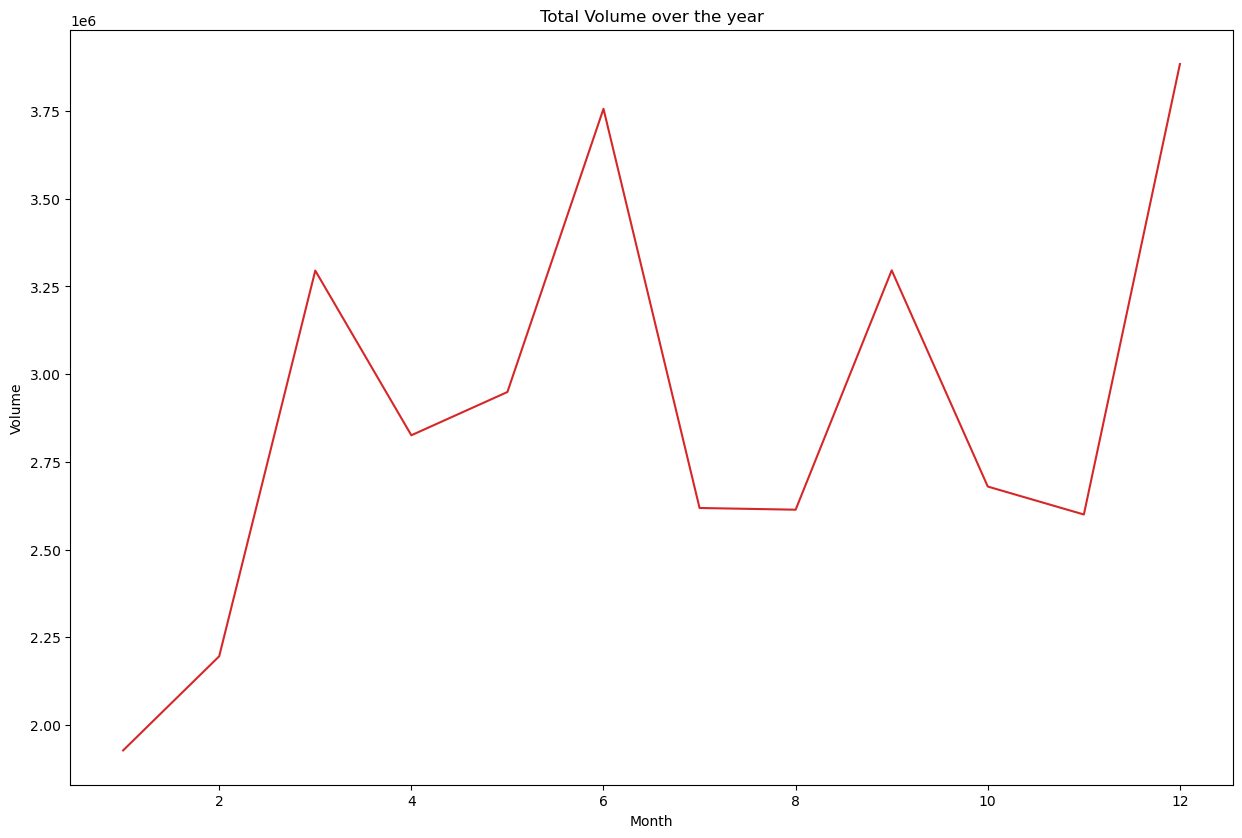

In [518]:
skumaster_demand['MonthNo']=skumaster_demand['Month'].apply(lambda x:datetime.datetime.strptime(x, "%b").month)
x=skumaster_demand.groupby('MonthNo')['Units'].sum()
#plt.plot(x.index, x.values, color='tab:red')
plt.figure(figsize=(15,10),dpi=100)
plt.plot(x.index, x.values, color='tab:red')
plt.gca().set(title='Total Volume over the year', xlabel='Month', ylabel='Volume')
plt.show()

There seems to be a seasonal trend since there are spikes on 3rd,6th and 9th month

# Analyse seasonility among category codes

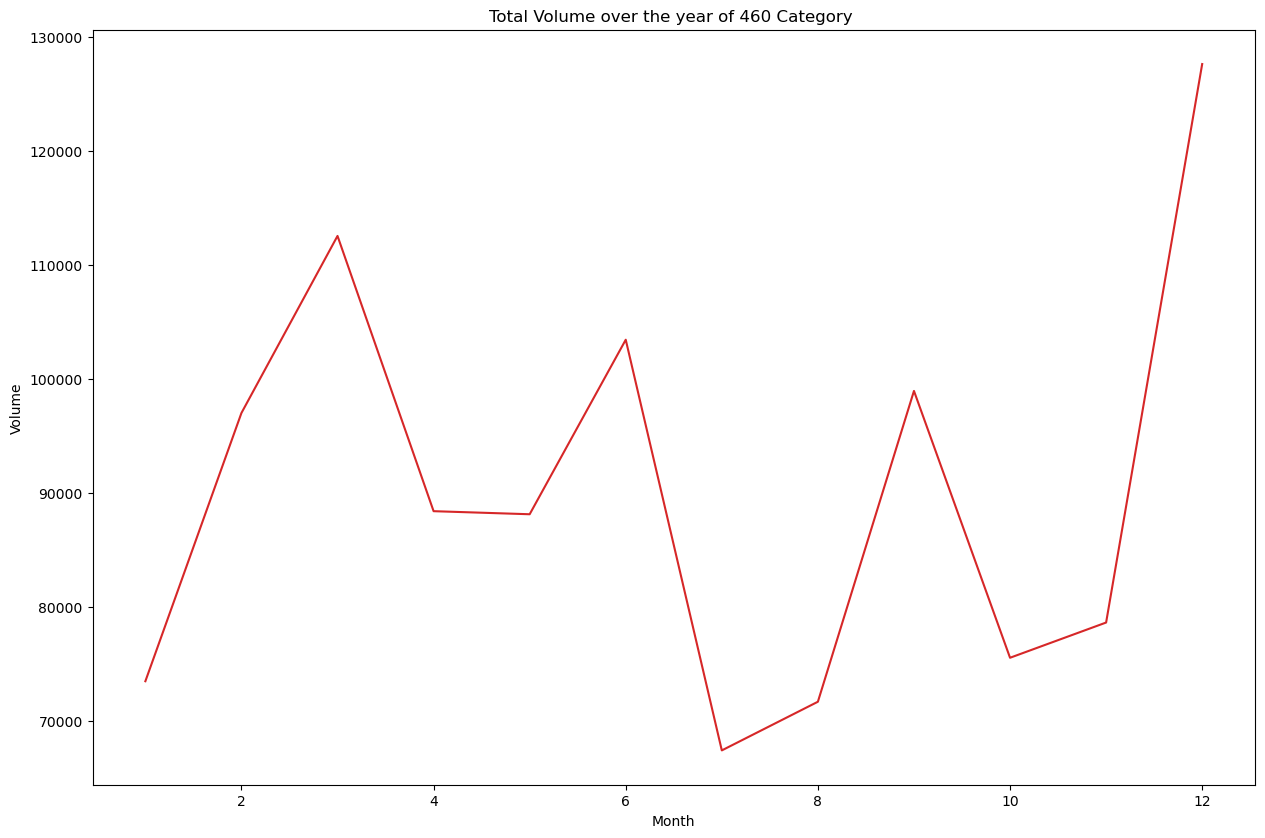

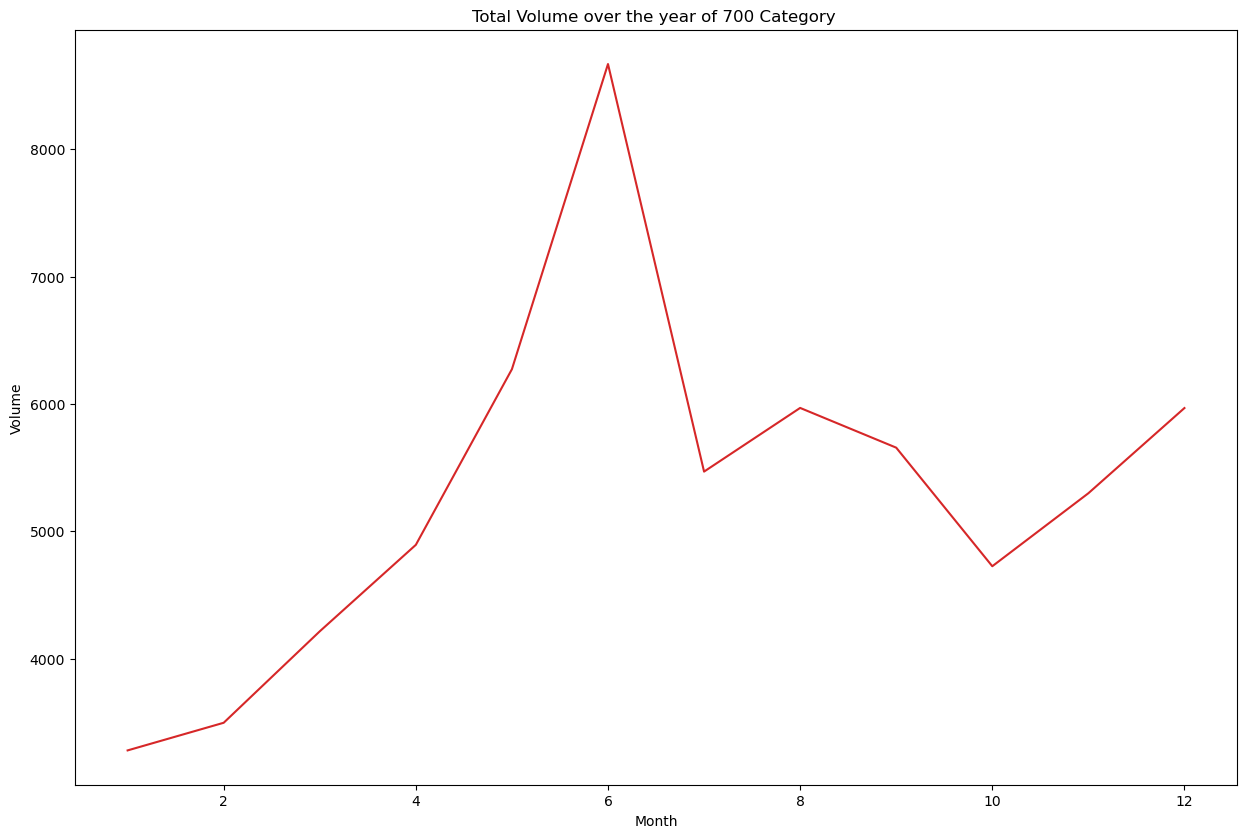

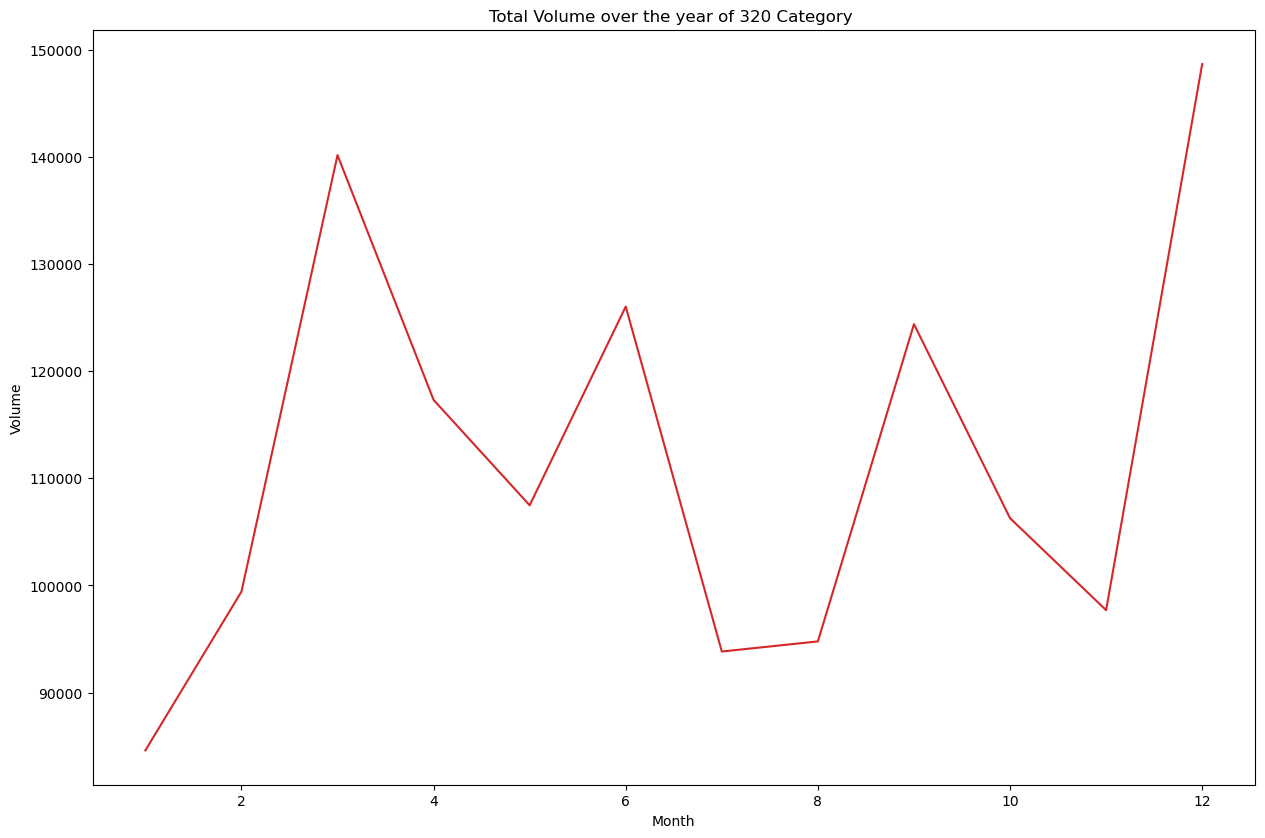

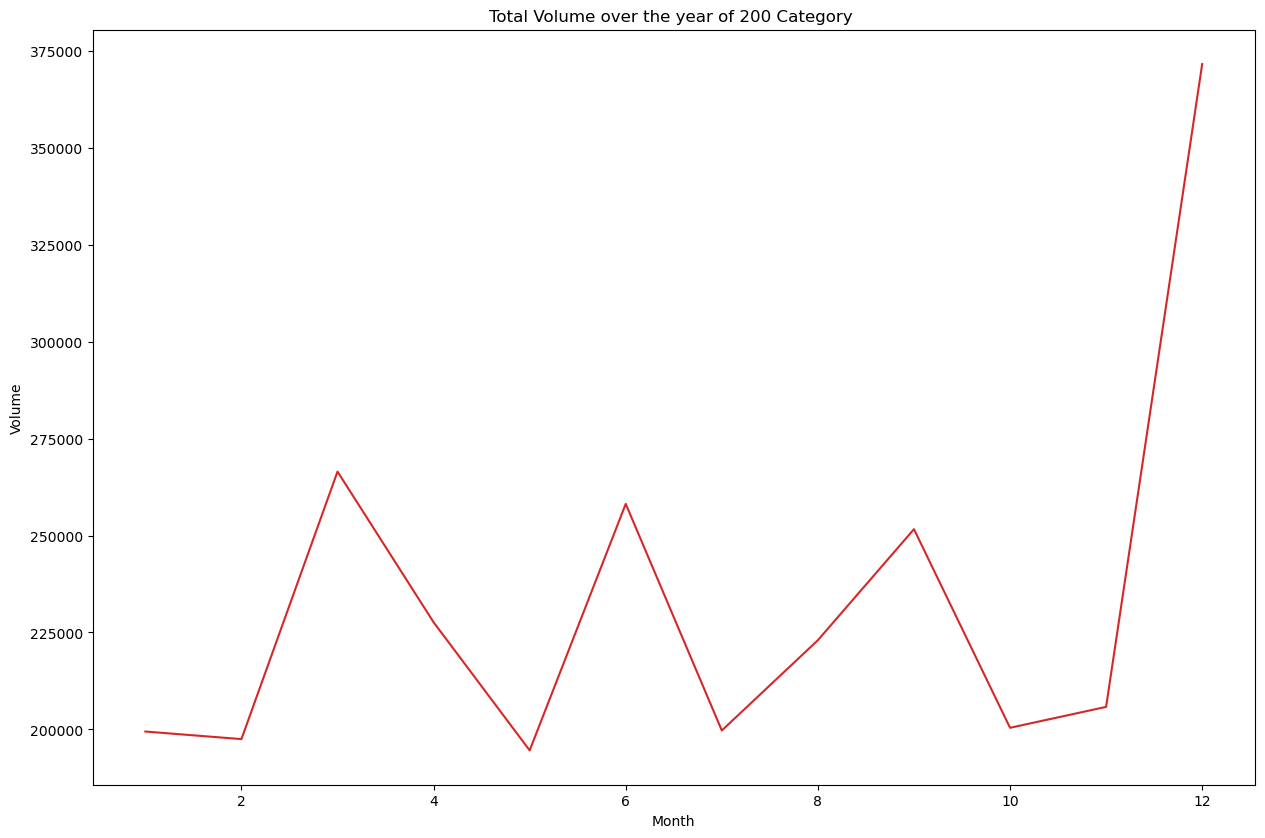

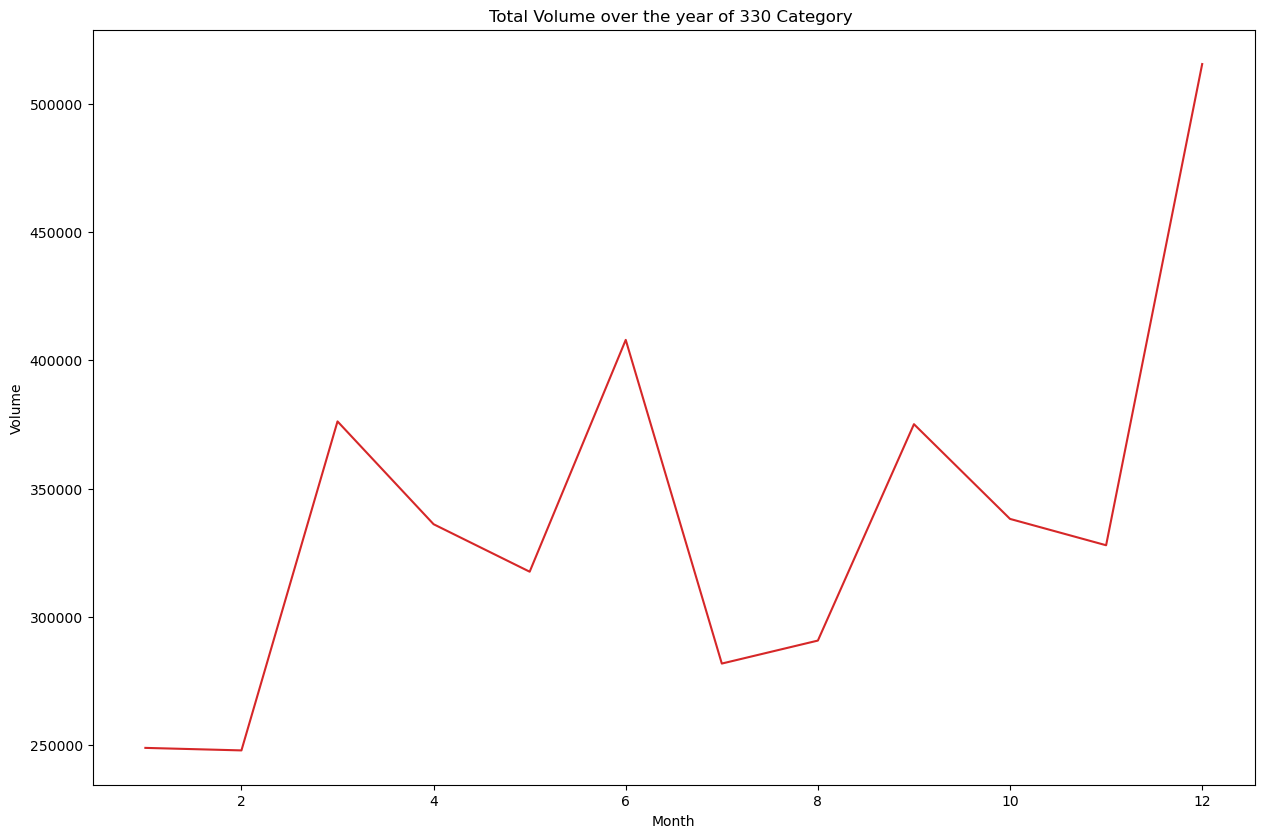

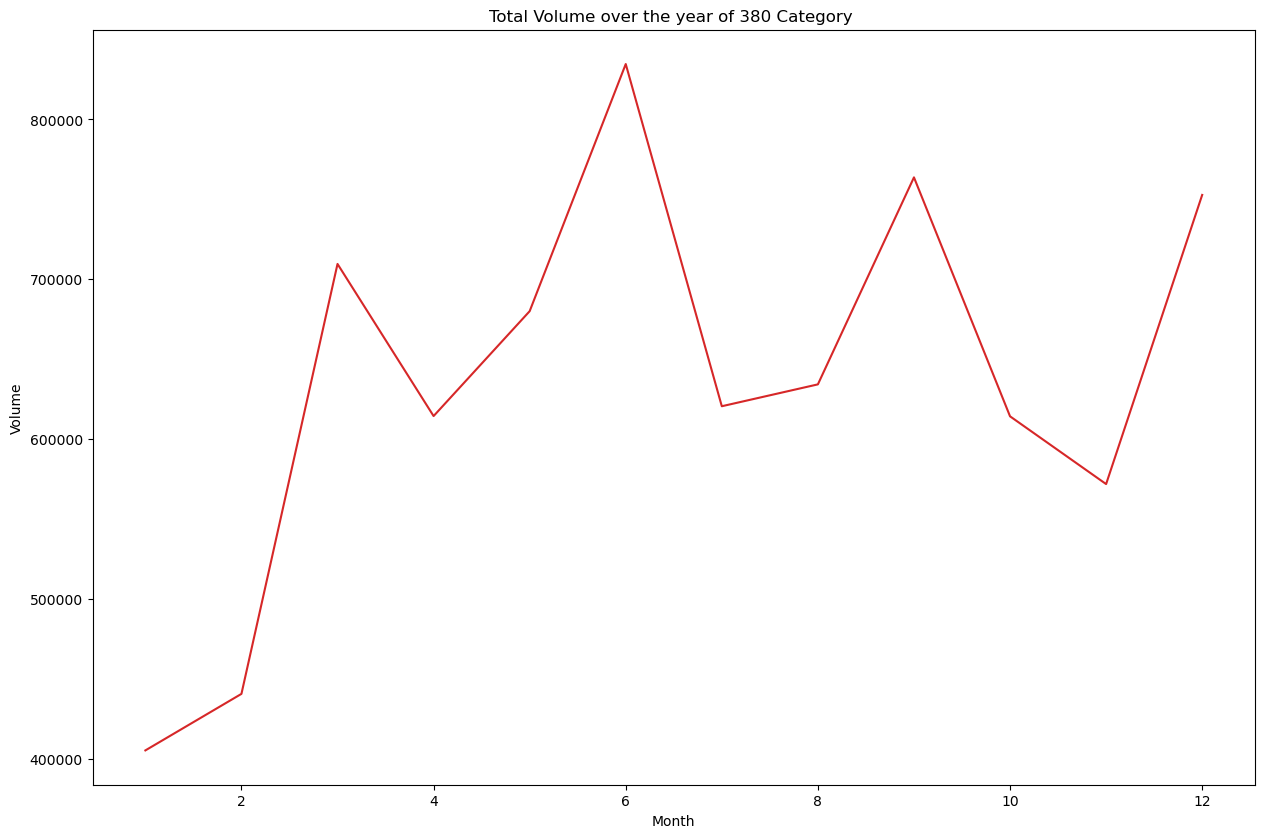

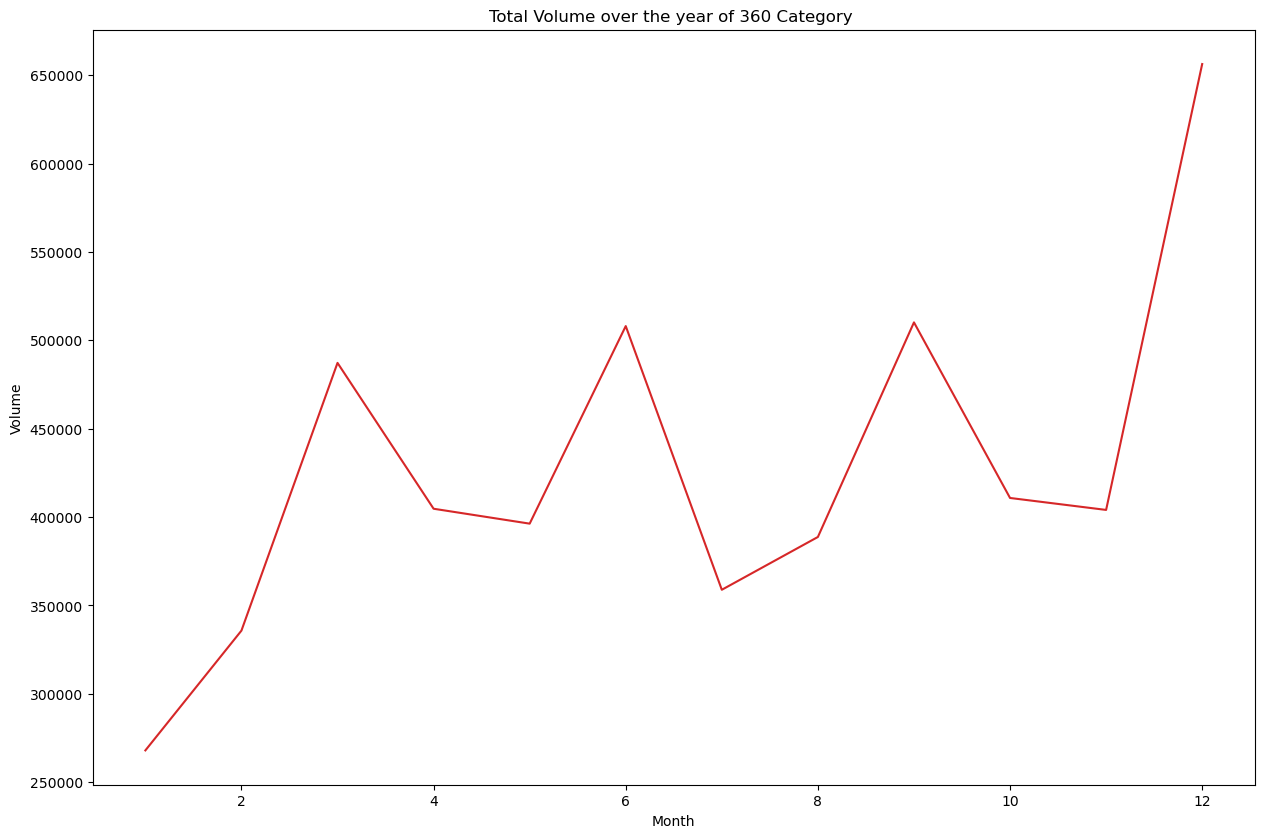

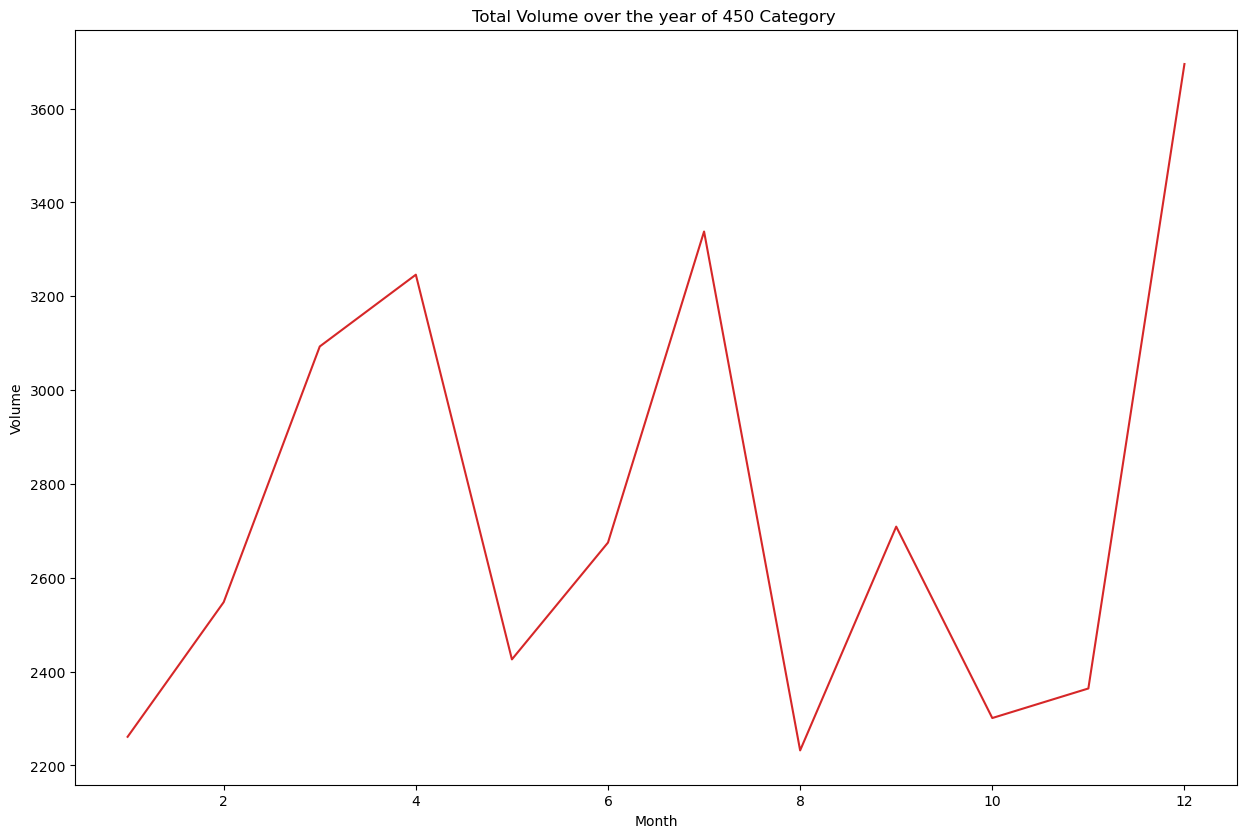

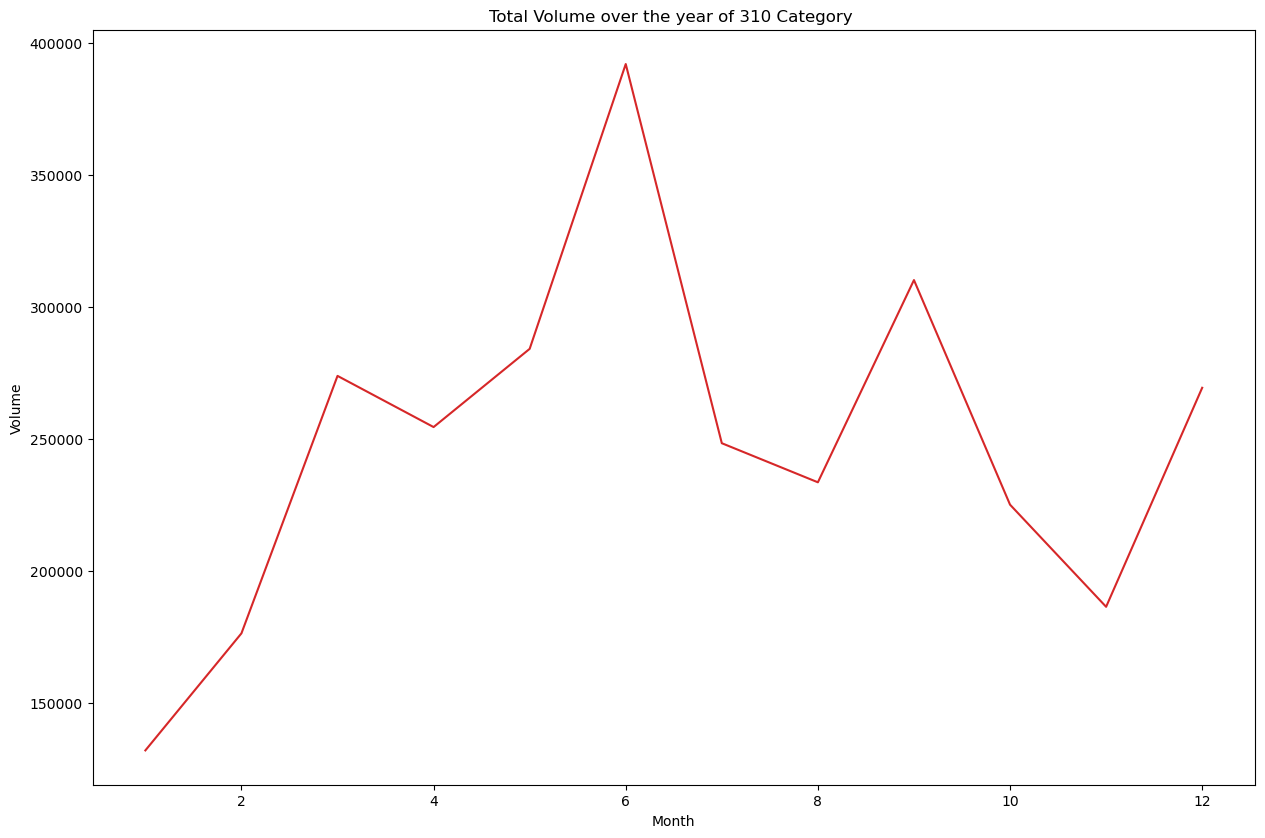

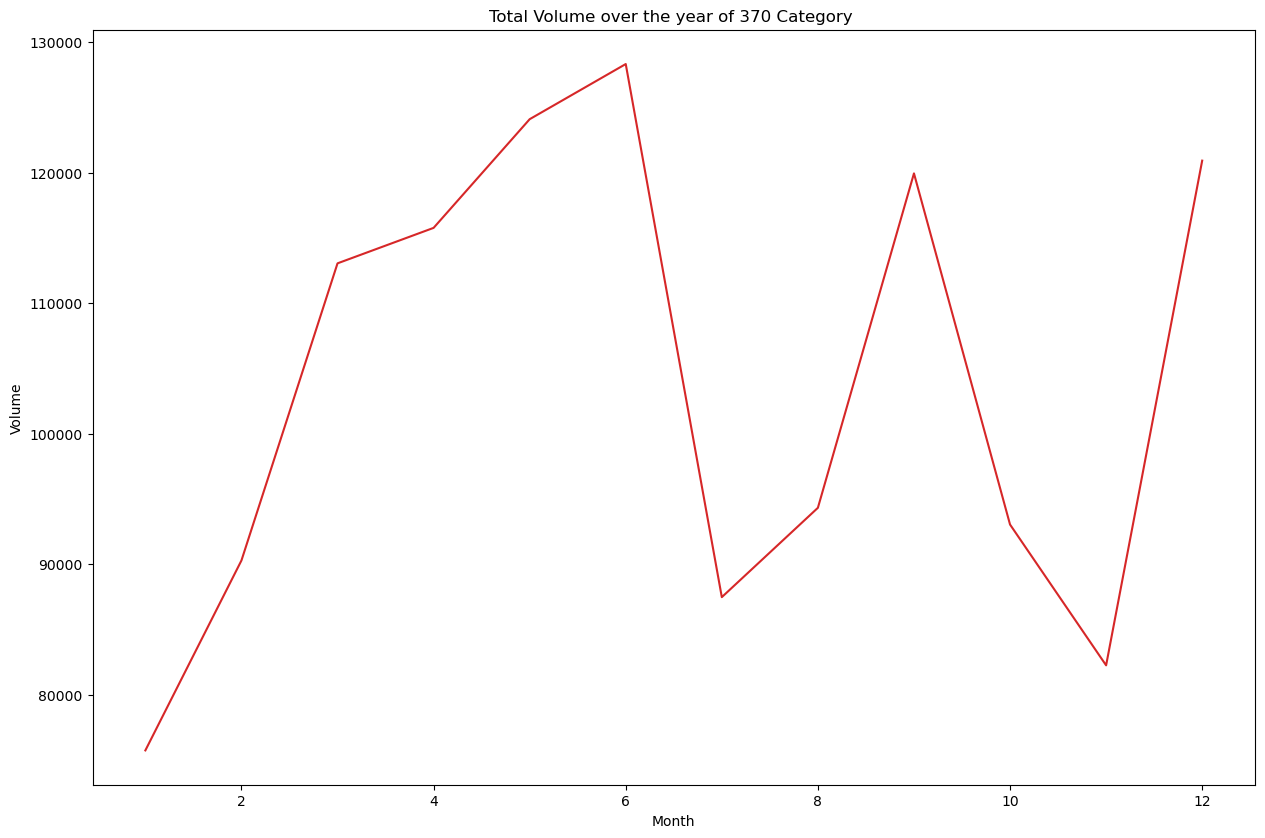

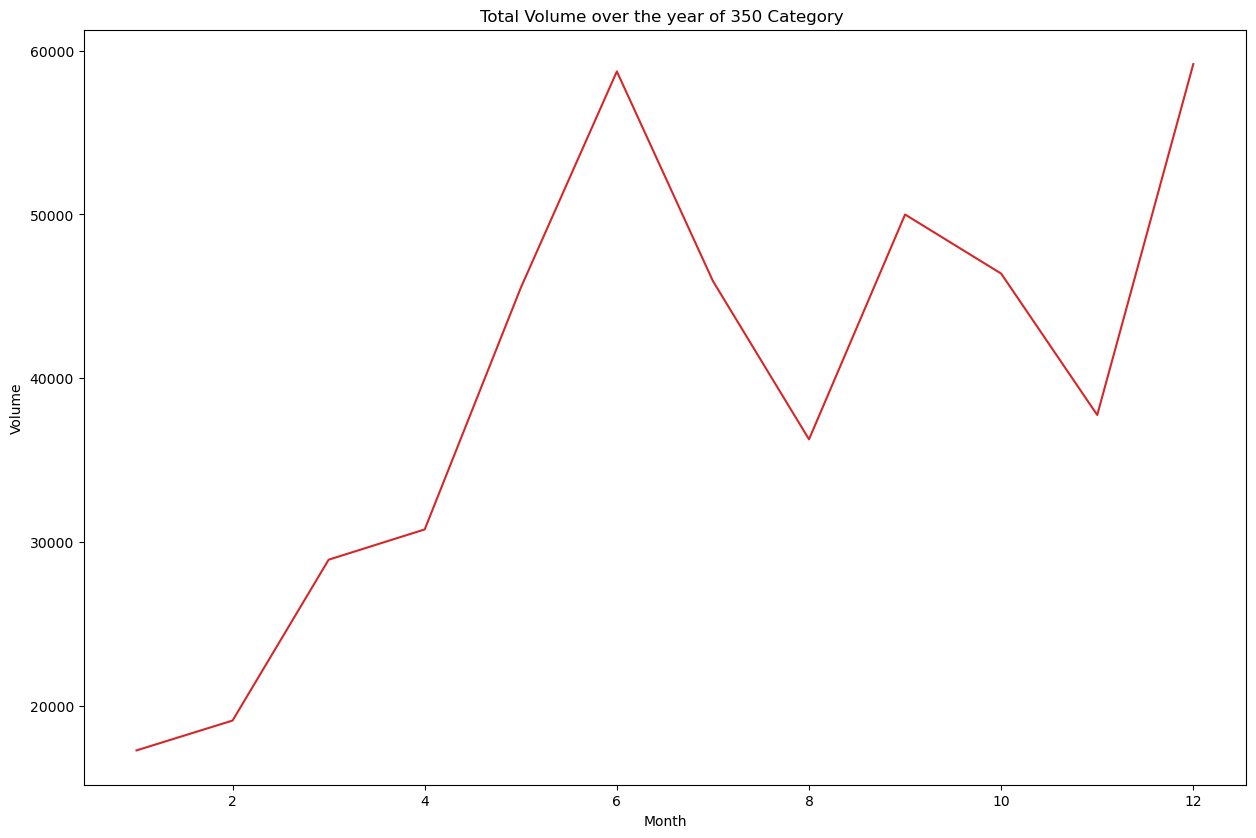

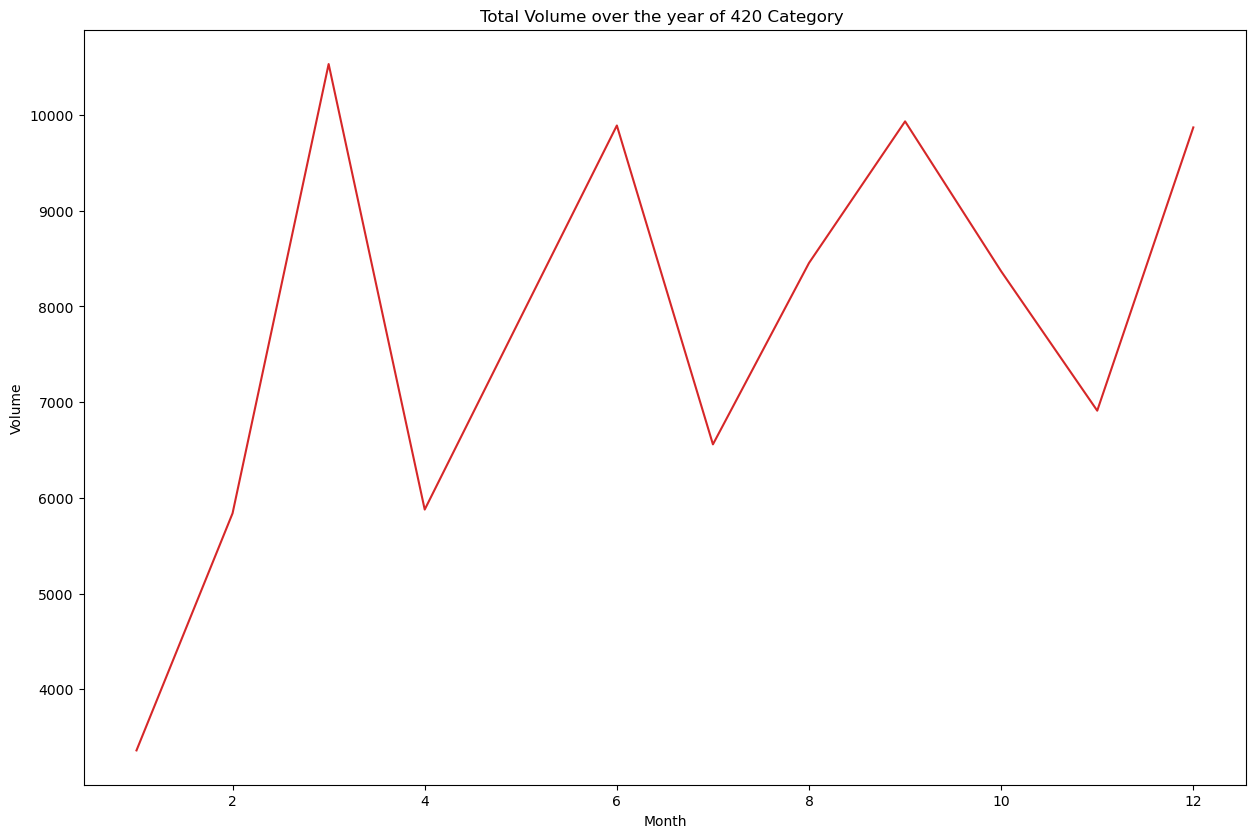

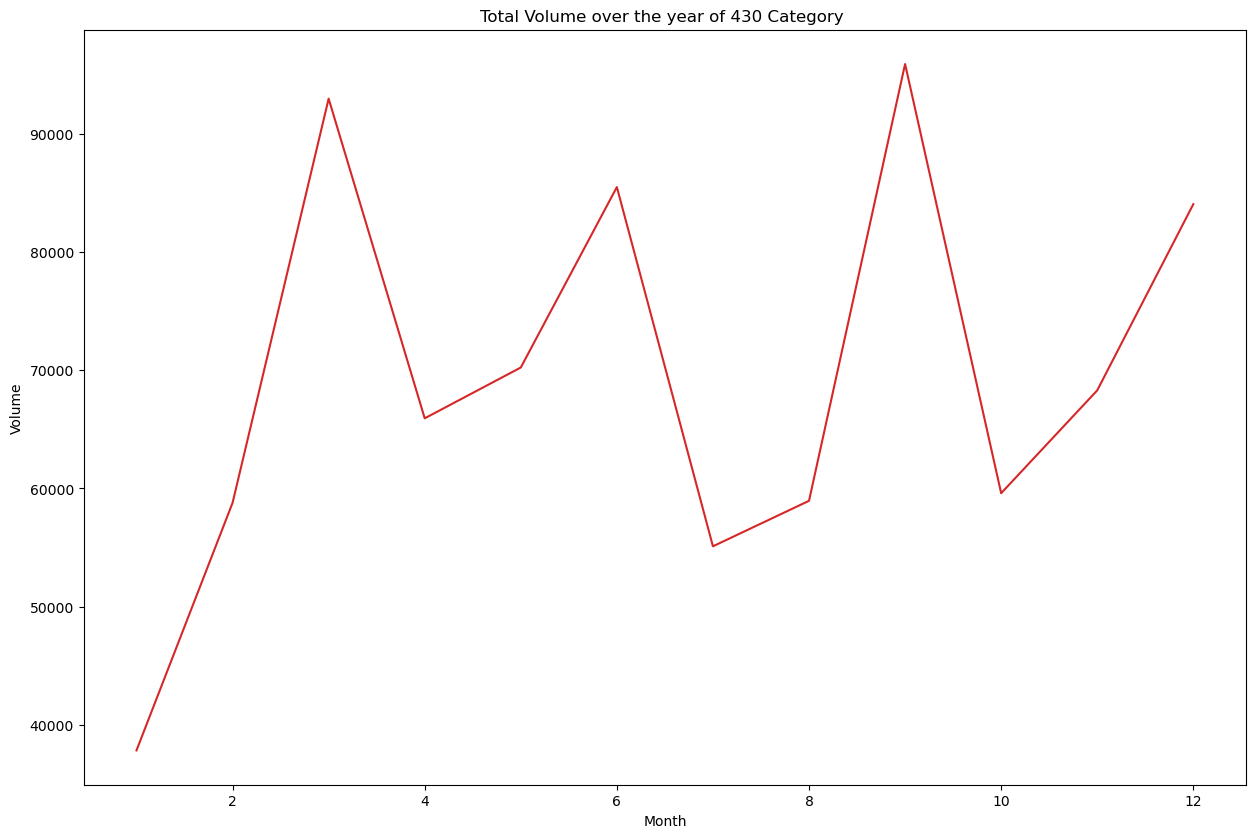

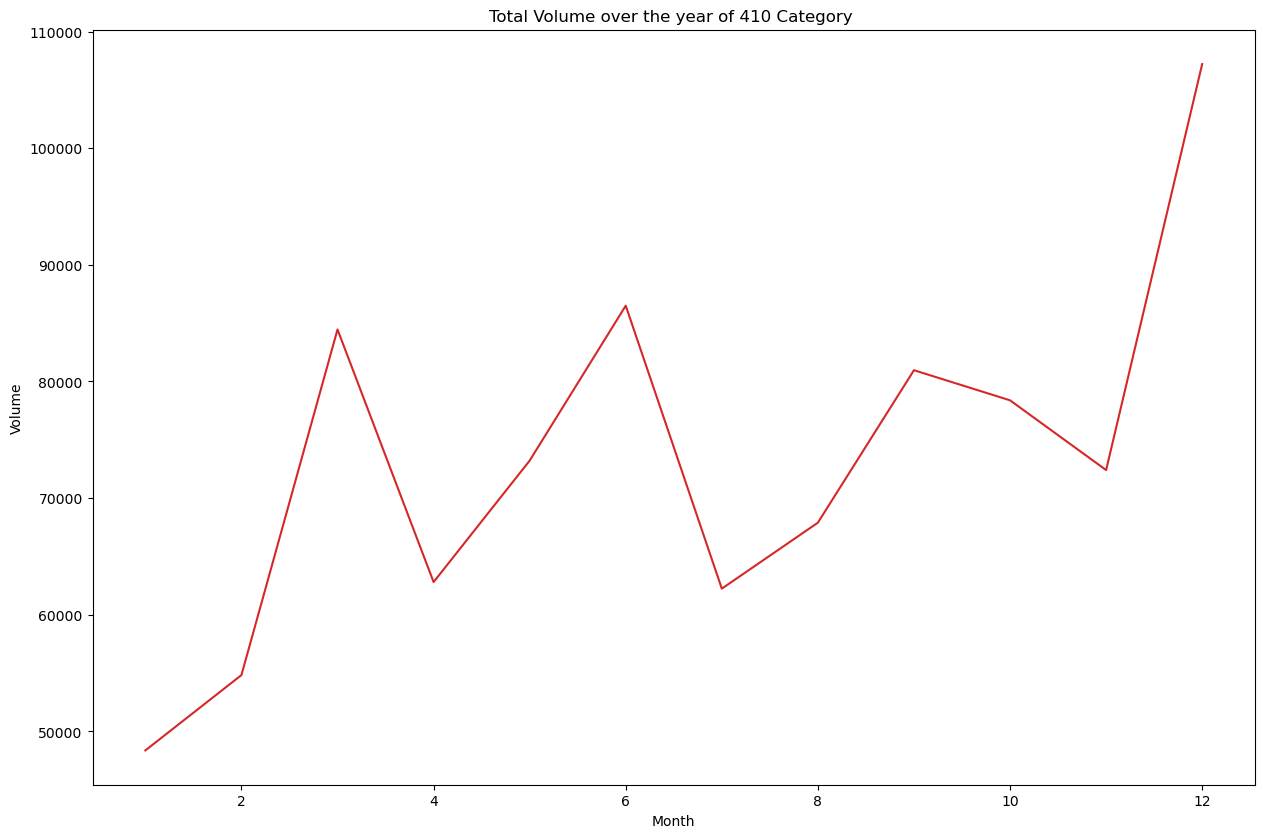

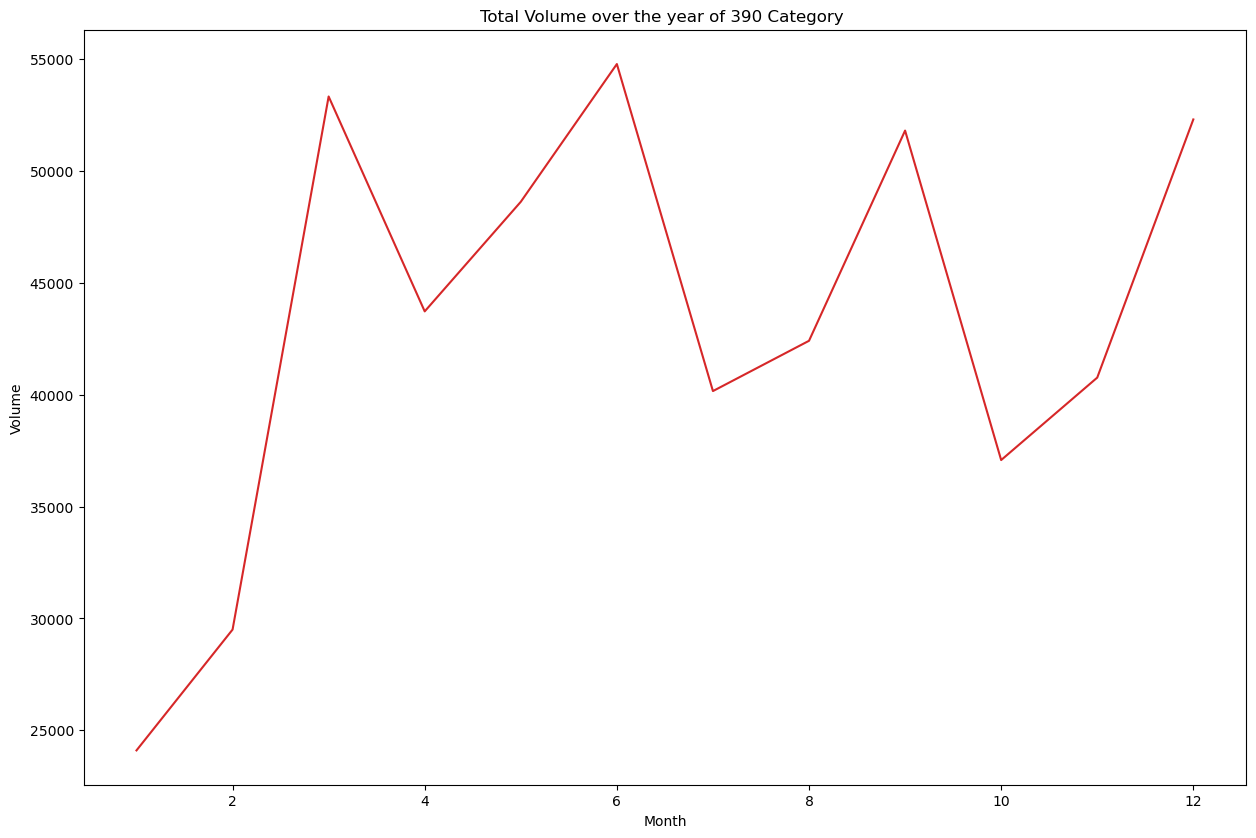

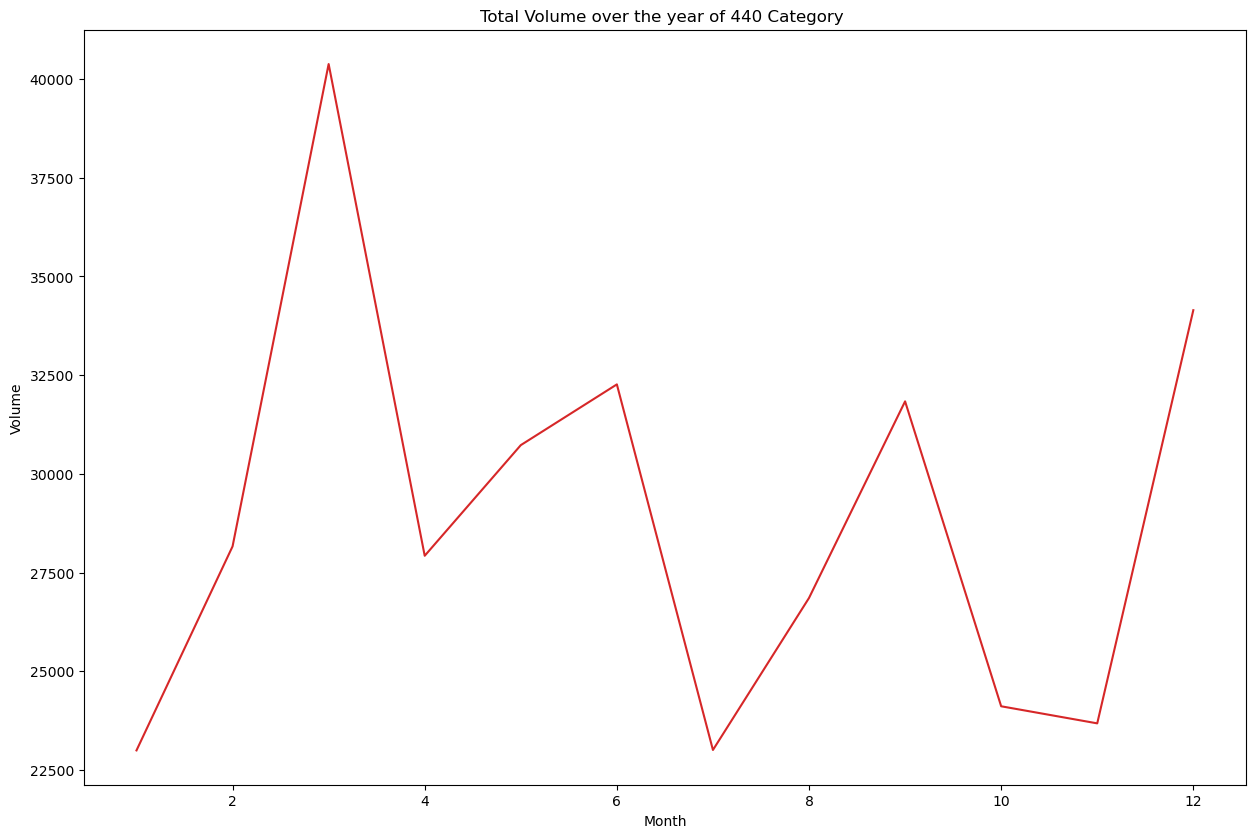

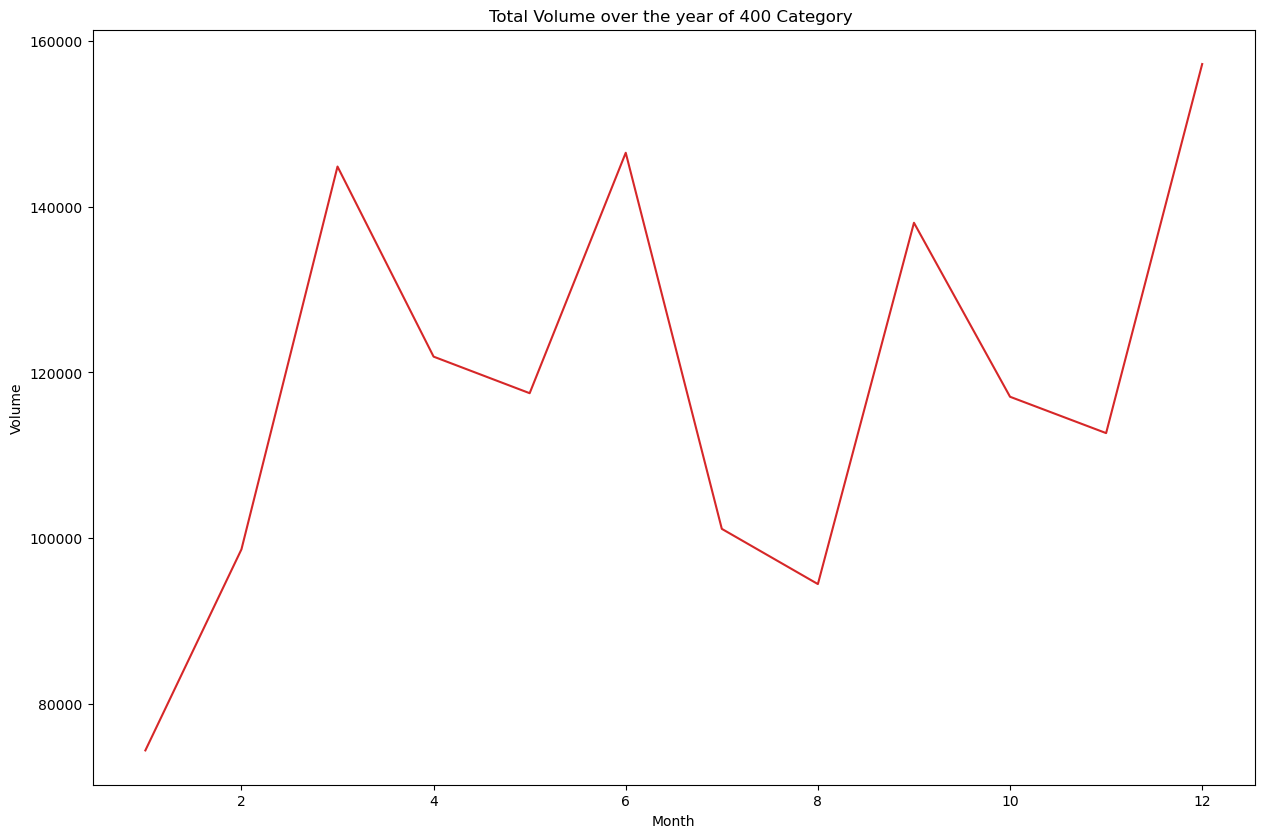

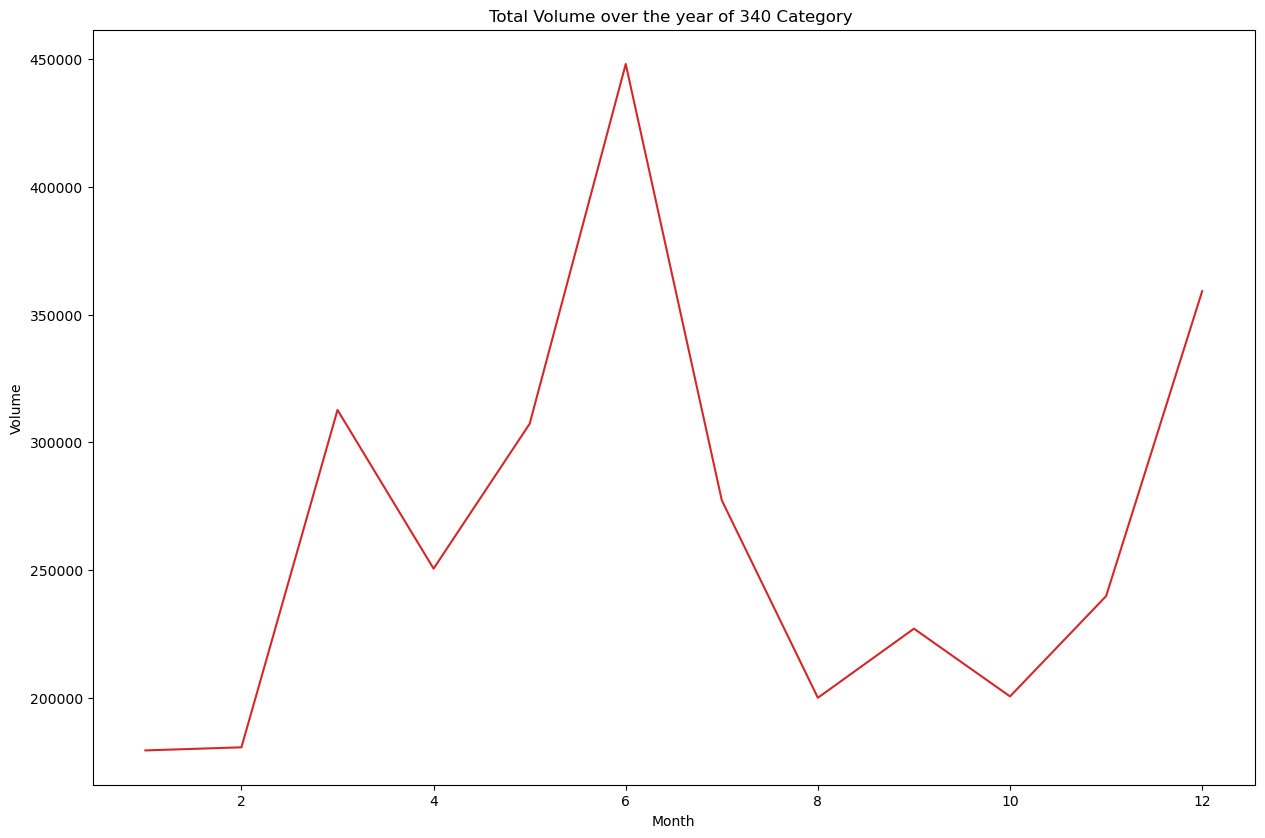

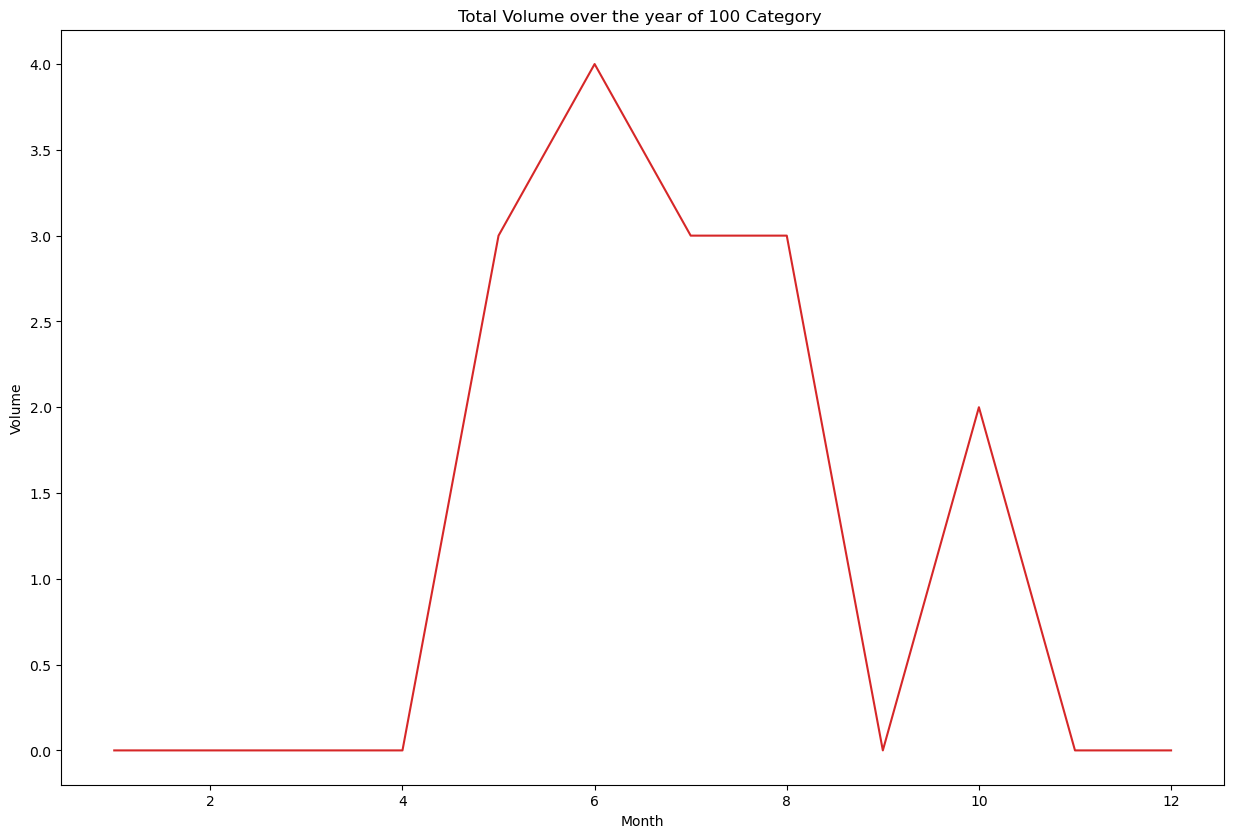

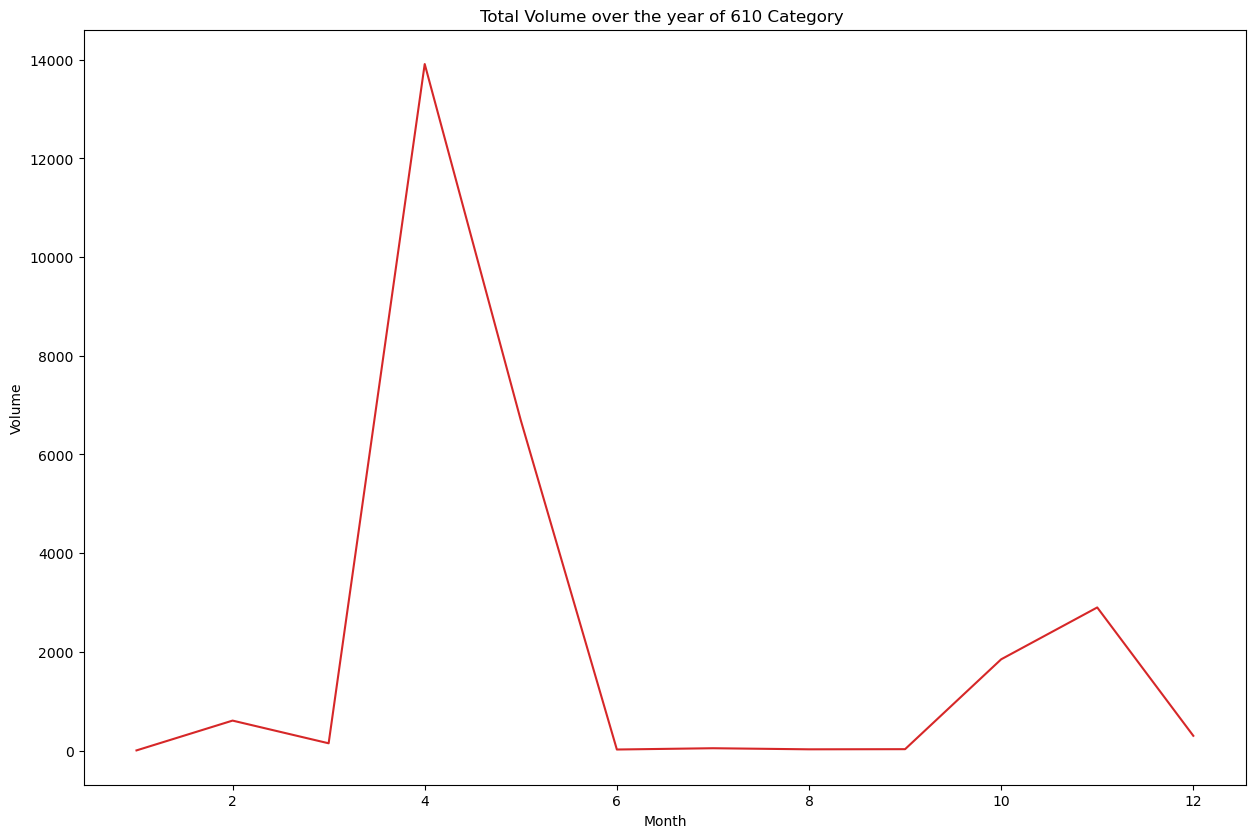

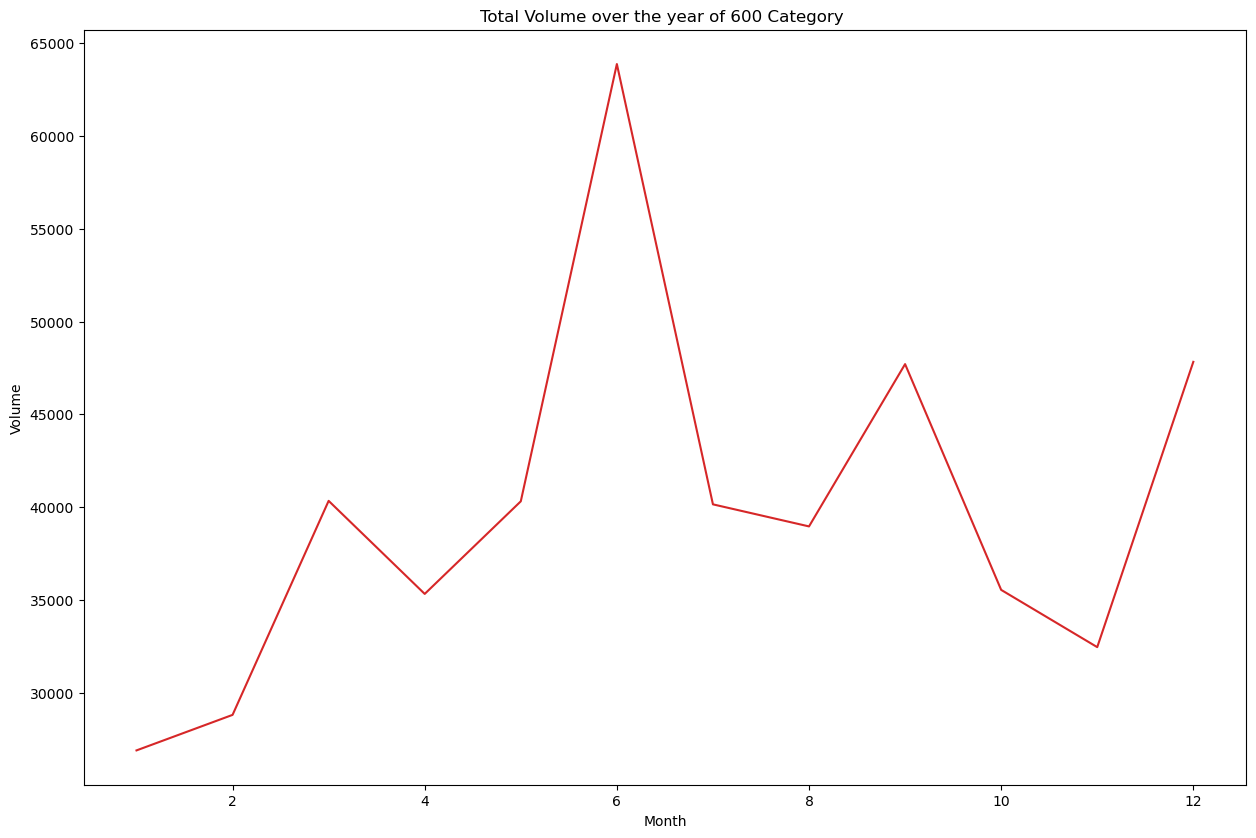

In [519]:
for i in list(skumaster_demand.CategoryCode.unique()):
    x=skumaster_demand[skumaster_demand.CategoryCode==i].groupby('MonthNo')['Units'].sum()
    #plt.plot(x.index, x.values, color='tab:red')
    plt.figure(figsize=(15,10),dpi=100)
    plt.plot(x.index, x.values, color='tab:red')
    plt.gca().set(title='Total Volume over the year of '+str(i)+' Category ', xlabel='Month', ylabel='Volume')
    plt.show()

#For category code 460,320,200,330,380,360,450,310,420,430,410,390,440,400,600 there seems to be a seasonality

# Q7. Calculate COV of Demand for each product COV (in units)=(Std.Dev of Units)/(Avg of Units). Create three clusters (Low, Med, High) in increasing order of COV with top 50% of units in Low, Next 30% in medium and bottom 20% in high.

In [520]:
cov=demand.groupby(['SKU']).apply(lambda x: x['Units'].std()/x['Units'].mean() if x['Units'].mean()>0 else False)
cov=cov.astype('float')

In [521]:
cov

SKU
110053     0.618499
110054     0.808045
110056     0.553555
110124     0.197589
110125     0.251866
             ...   
8491839    3.464102
8494759    3.464102
8495038    3.464102
8495046    3.464102
8495053    3.464102
Length: 22923, dtype: float64

In [522]:
Lowcluster=cov.sort_values().head(int(len(cov)*.5))
Lowcluster

SKU
2940044    0.000000
8408098    0.000000
8239360    0.000000
8160178    0.000000
2990070    0.000000
             ...   
1030052    1.063878
8440174    1.063990
8129363    1.064014
8052849    1.064233
8175663    1.064254
Length: 11461, dtype: float64

In [523]:
Mediumcluster=cov.sort_values().head(int(len(cov)*.8))[len(Lowcluster):]
Mediumcluster

SKU
8040719    1.064265
8002384    1.064434
4279964    1.064494
8405375    1.064554
8213597    1.065005
             ...   
8103863    2.335497
8407033    2.335497
8405128    2.335497
8405086    2.335497
8085268    2.335497
Length: 6877, dtype: float64

In [524]:
Highcluster=cov.sort_values().tail(int(len(cov)*.2))
Highcluster

SKU
8292708     2.335497
8292229     2.335497
8088296     2.335497
8089781     2.335497
8404196     2.335497
             ...    
8224651    15.736466
1070020    15.736466
8029607    18.060504
2918142    19.456245
8370017    29.151641
Length: 4584, dtype: float64

# Q8. Generate a pareto by SKU (in terms of retailprice) and see how many SKUs account for top 80%, next 15%, and bottom 5% of the sales

In [525]:
x=demand.groupby('SKU')['Retail'].sum()

In [526]:
Top80=x.sort_values(ascending=False).head(int(len(x)*.8))
Top80

SKU
8265233    998050.0
8088379    819542.0
8203929    735874.0
8142606    727927.0
8348955    705053.0
             ...   
8327678       105.0
8241580       105.0
8489536       105.0
8379802       105.0
8186231       105.0
Name: Retail, Length: 18338, dtype: float64

In [527]:
len(Top80)

18338

In [528]:
Next15=x.sort_values(ascending=False).head(int(len(x)*.95))[len(Top80):]
Next15

SKU
8297921    105.0
3460080    105.0
8455271    105.0
8407678    105.0
8005581    105.0
           ...  
8107443      7.0
8003396      7.0
8093056      7.0
8338139      7.0
8396665      7.0
Name: Retail, Length: 3438, dtype: float64

In [529]:
Last5=x.sort_values(ascending=False).tail(int(len(x)*.05))
Last5

SKU
1290082    7.0
8466930    7.0
8201584    7.0
8298408    7.0
8426215    7.0
8299547    7.0
8259756    7.0
8313736    7.0
8315806    7.0
8395840    7.0
8258980    7.0
8427148    7.0
8056566    6.0
8213852    6.0
8205700    6.0
8320699    6.0
8455123    6.0
8366502    6.0
8084501    6.0
8097099    6.0
8405383    6.0
8006226    6.0
430044     6.0
8111809    6.0
8203150    6.0
8111676    6.0
8111601    6.0
2970029    6.0
8147654    6.0
8358624    6.0
3802683    6.0
8374589    6.0
8228306    6.0
8302580    6.0
8228702    6.0
8001292    6.0
8304867    6.0
8245961    6.0
8144248    6.0
8289456    6.0
8029634    6.0
8229437    6.0
8001680    6.0
8387292    6.0
8145666    6.0
8244782    6.0
8002875    6.0
8432015    6.0
8320277    6.0
3800397    6.0
8393662    6.0
8242406    6.0
1290319    6.0
8448060    6.0
8164048    6.0
5710130    6.0
8490195    6.0
8201691    6.0
8490237    6.0
8315137    6.0
8371080    6.0
8360166    6.0
8055501    6.0
8163040    6.0
8006748    6.0
8235608    6.0
386003

In [530]:
df = pd.DataFrame({
    'Bucket': ['Top80', 'Next15', 'Last5'],
    'Count': [len(Top80),  len(Next15),  len(Last5)]
})
df

,Bucket,Count
0,Top80,18338
1,Next15,3438
2,Last5,1146


In [531]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

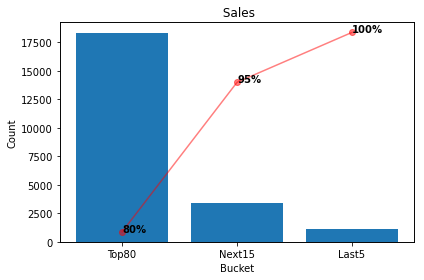

In [532]:
pareto_plot(df, x='Bucket', y='Count', title=' Sales')